### KOA Classification Analysis with Graph Based Models

In [10]:
base_path= "./Medical Image/MedicalExpert-I"

### Image Pre-processing

In [409]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from skimage import io, img_as_float
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage.util import random_noise

In [49]:
def plot_histogram(image, save_path):
    """Plots and saves the histogram and CDF of the given grayscale image."""
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf.max()
    
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.hist(image.flatten(), bins=256, range=[0, 256], color='r')
    ax.set_xlabel('Pixel Intensity')
    ax.set_ylabel('#Pixels')
    ax.set_xlim(0, 255)
    
    ax2 = ax.twinx()
    ax2.plot(cdf_normalized, color='b')
    ax2.set_ylabel('CDF')
    ax2.set_ylim(0, 1)
    
    plt.savefig(save_path)
    plt.close(fig)

In [41]:
def process_xray_images(folder_path, sigma=0.03, patch_size=4, patch_distance=13):
    """Processes grayscale X-ray images and saves outputs in organized folders."""

    save_folder_path =folder_path + "-Processed"
    os.makedirs(save_folder_path, exist_ok=True)

    
    # Define subfolders for saving outputs
    hist_folder = os.path.join(save_folder_path, "histogram")
    equ_folder = os.path.join(save_folder_path, "equalized")
    denoised_folder = os.path.join(save_folder_path, "denoised")
    
    # Create directories if they don't exist
    os.makedirs(hist_folder, exist_ok=True)
    os.makedirs(equ_folder, exist_ok=True)
    os.makedirs(denoised_folder, exist_ok=True)
    
    for filename in os.listdir(folder_path):
        if filename.endswith('.png') or filename.endswith('.jpg'):
            try:
                # Read the grayscale X-ray image
                image_path = os.path.join(folder_path, filename)
                f = cv2.imread(image_path, cv2.IMREAD_COLOR)
                
                if f is None:
                    print(f"Failed to read {image_path}")
                    continue
                
                # Extract filename without extension
                file_name, file_ext = os.path.splitext(filename)

                # Save the histogram of the original image
                hist_image_path = os.path.join(hist_folder, f"{file_name}_hist.png")
                # plot_histogram(f, hist_image_path)
                # print(f"Histogram saved at {hist_image_path}")
                
                # Perform histogram equalization
                lab_img = cv2.cvtColor(f, cv2.COLOR_BGR2LAB)
                l, a, b = cv2.split(lab_img)
        
                # Perform histogram equalization (global)
                equ = cv2.equalizeHist(l)
                plot_histogram(equ, hist_image_path)
                
                # Save the equalized image
                equ_image_path = os.path.join(equ_folder, f"{file_name}_equ.png")
                cv2.imwrite(equ_image_path, equ)
                # print(f"Equalized image saved at {equ_image_path}")
                
                # Save the histogram of the equalized image
                equ_hist_image_path = os.path.join(hist_folder, f"{file_name}_equ_hist.png")
                plot_histogram(equ, equ_hist_image_path)
                # print(f"Equalized histogram saved at {equ_hist_image_path}")
                
                # Perform fast non-local means denoising
                image = img_as_float(equ, force_copy=True)
                noisy_image = random_noise(image, var=sigma ** 2)
                sigma_est = np.mean(estimate_sigma(noisy_image))
                denoised_image = denoise_nl_means(noisy_image, h=0.8 * sigma_est, fast_mode=True,
                                                  patch_size=patch_size, patch_distance=patch_distance)
                
                # Save the denoised image
                denoised_image_path = os.path.join(denoised_folder, f"{file_name}_denoised.png")
                denoised_image = (denoised_image * 255).astype(np.uint8)
                cv2.imwrite(denoised_image_path, denoised_image)
                print('.', end='')
                
            except Exception as e:
                print(f"Error processing {filename}: {e}")


In [52]:
# # Pre-Process all the images

process_xray_images(base_path + '/0Normal')
process_xray_images(base_path + '/1Doubtful')
process_xray_images(base_path + '/2Mild')
process_xray_images(base_path + '/3Moderate')
process_xray_images(base_path + '/4Severe')

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

### Storage of libraries

In [106]:
# import PIL
# import tqdm
# import pickle
# import numpy as np
# import matplotlib.pyplot as plt
# from torchvision import datasets
# from skimage.filters import gabor
# from skimage.feature import graycomatrix, graycoprops
# from skimage.feature import local_binary_pattern
# import numpy as np
# import pandas as pd
# import cv2
# import matplotlib.pyplot as plt
# import os
# import shutil
# from sklearn.model_selection import train_test_split




# import os
# import shutil

# import warnings 
# warnings.filterwarnings('ignore')
# from sklearn.linear_model import LogisticRegression
# import random
# import pickle
# from sklearn import model_selection
# from pylab import *
# #from kneed import KneeLocator
# from sklearn.datasets import make_blobs
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
# from sklearn.preprocessing import StandardScaler
# import scipy.fftpack
# from skimage import data, io
# from scipy.signal import convolve2d as conv2
# #import lightgbm as lgb
# from sklearn import metrics
# from sklearn.model_selection import train_test_split,cross_val_score
# from skimage import color, data, restoration

# from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
# from xgboost import XGBClassifier
# from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
# from sklearn.svm import SVC

# %matplotlib inline
# from sklearn import preprocessing

# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches

# from skimage import data
# from skimage.filters import threshold_otsu
# from skimage.segmentation import clear_border
# from skimage.measure import label, regionprops
# from skimage.morphology import closing, square
# from skimage.color import label2rgb
# import skimage.io as io
# import skimage as sk
# from skimage import measure
# import math
# from math import sqrt
# from skimage import io, color, img_as_ubyte
# from sklearn.metrics.cluster import entropy
# from scipy.stats import skew, kurtosis
# from numpy import asarray
# from PIL import Image

# import math
# from math import sqrt

# import skimage as sk
# from skimage import measure

# from numpy import asarray
# from PIL import Image
# import math
# from math import sqrt

# import skimage as sk
# from skimage import measure

# from numpy import asarray
# from PIL import Image

# import numpy as np
# from skimage import io, color, img_as_ubyte
# from sklearn.metrics.cluster import entropy

# import scipy
# import cv2
# from scipy.stats import skew, kurtosis
# import skimage
# from skimage.filters import threshold_otsu

### Feature extractions

In [ ]:
import os
import pandas as pd
import numpy as np
import math
from math import sqrt
from skimage import io as skio, measure
from skimage.filters import threshold_otsu
from skimage.feature import local_binary_pattern
from skimage.measure import shannon_entropy
from skimage.filters import gabor
from skimage.feature.texture import graycomatrix
from scipy.stats import skew, kurtosis

In [67]:
def extract_features(image_dir_path, class_category, feature_df):
    # Process files
    print("\n Processing dir Path: ", image_dir_path)
    onlyfiles = [f for f in os.listdir(image_dir_path) if os.path.isfile(os.path.join(image_dir_path, f))]
    print(f"Total files: {len(onlyfiles)}")

    for i in onlyfiles:
        path = os.path.join(image_dir_path, i)
        print('.', end='')

        try:
            # Read the grayscale image directly
            gray = skio.imread(path, as_gray=True)
            if gray is None or gray.size == 0:
                print('Image could not be read, skipping.', end='')
                continue

            height, width = gray.shape
            area = gray.size  # Total number of pixels

            # Otsu's threshold and binary conversion
            thresh = threshold_otsu(gray)
            binary = gray > thresh
            perimeter = measure.perimeter(binary)

            # Calculate features
            PA_ratio = round(perimeter / area, 4)
            EquivDiameter = round(sqrt(4 * area / math.pi), 4)
            Circularity = round((4 * area * math.pi) / (perimeter ** 2), 4)

            # Region properties
            props = measure.regionprops(measure.label(binary))
            if not props:
                print('No region props found, skipping.', end='')
                continue

            largest_region = max(props, key=lambda x: x.area)
            ConvexArea = largest_region.convex_area
            Extent = largest_region.extent
            Solidity = largest_region.solidity
            FilledArea = largest_region.filled_area
            maj_ax_le = largest_region.major_axis_length
            min_ax_le = largest_region.minor_axis_length

            # Statistical properties
            mean = round(gray.mean(), 3)
            std = round(gray.std(), 3)
            sha_entropy = round(shannon_entropy(gray), 4)

            # LBP & Gabor features
            feat_lbp = local_binary_pattern(gray, 8, 1, 'uniform')
            feat_lbp = np.uint8((feat_lbp / feat_lbp.max()) * 255)
            lbp_hist, _ = np.histogram(feat_lbp, bins=8)
            lbp_prob = lbp_hist / lbp_hist.sum()
            lbp_energy = np.sum(lbp_prob ** 2)
            lbp_entropy = -np.sum(lbp_prob * np.log2(lbp_prob + 1e-10))

            gabor_real, gabor_imag = gabor(gray, frequency=0.6)
            gabor_filt = (gabor_real ** 2 + gabor_imag ** 2) // 2
            gabor_hist, _ = np.histogram(gabor_filt, bins=8)
            gabor_prob = gabor_hist / gabor_hist.sum()
            gabor_energy = np.sum(gabor_prob ** 2)
            gabor_entropy = -np.sum(gabor_prob * np.log2(gabor_prob + 1e-10))

            # GLCM and texture features
            distances = [1, 2, 3]
            angles = [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4]
            glcm = graycomatrix((gray * 255).astype(np.uint8), distances=distances, angles=angles, symmetric=True, normed=True)
            glcm_entropy = round(-np.sum(glcm * np.log2(glcm + 1e-10)), 4)

            # Skewness and kurtosis
            Skewness = round(skew(gray.flatten()), 4)
            Kurtosis = round(kurtosis(gray.flatten()), 4)

            # SIFT keypoints
            sift = cv2.SIFT_create()
            keypoints = sift.detect((gray * 255).astype(np.uint8), None)
            sift_keypoints = len(keypoints)

            # Width-to-height ratio

            # Eccentricity ratio
            ecl_ratio = round(maj_ax_le / min_ax_le, 4) if min_ax_le > 0 else 0

            # Harris corner detection
            harris_corners = cv2.cornerHarris((gray * 255).astype(np.float32), blockSize=2, ksize=3, k=0.04)
            harris_corner = np.sum(harris_corners > 0.01 * harris_corners.max())

            # Add data to DataFrame
            feature_df.loc[len(feature_df)] = {
                'Class': class_category, 'Area': area, 'PA_ratio': PA_ratio, 'Solidity': Solidity,
                'Circularity': Circularity, 'EquivDiameter': EquivDiameter, 
                'ConvexArea': ConvexArea, 'Extent': Extent, 'FilledArea': FilledArea,
                'Major axis length': maj_ax_le, 'Minor axis length': min_ax_le,
                'Mean': mean, 'Standard Deviation': std, 'Shannon_Entropy': sha_entropy,
                'Glcm_entropy': glcm_entropy, 'Skewness': Skewness, 'kurtosis': Kurtosis,
                'lbp_energy': lbp_energy, 'lbp_entropy': lbp_entropy, 
                'gabor_energy': gabor_energy, 'gabor_entropy': gabor_entropy,
                'sift_keypoints': sift_keypoints,
                'ecl_ratio': ecl_ratio, 'harris_corner': harris_corner
            }

        except Exception as e:
            print(f"Error processing image {i}: {e}",)

    return feature_df


In [69]:

# Define directories
# normal_equalized_path = base_path + '/0Normal-Processed/denoised' 
# doubtful_equalized_path = base_path + '/1Doubtful-Processed/denoised'
# mild_equalized_path = base_path + '/2Mild-Processed/denoised'
# moderate_equalized_path = base_path + '/3Moderate-Processed/denoised'
# severe_equalized_path = base_path + '/4Severe-Processed/denoised'
normal_equalized_path = base_path + '/0Normal-Processed/equalized' 
doubtful_equalized_path = base_path + '/1Doubtful-Processed/equalized'
mild_equalized_path = base_path + '/2Mild-Processed/equalized'
moderate_equalized_path = base_path + '/3Moderate-Processed/equalized'
severe_equalized_path = base_path + '/4Severe-Processed/equalized'

csv = base_path + '/extracted_features.csv'         # CSV save path


feature_df = pd.DataFrame(columns=[
    'Class', 'Area', 'PA_ratio', 'Solidity', 'Circularity', 'EquivDiameter',
    'ConvexArea', 'Extent', 'FilledArea', 'Major axis length', 'Minor axis length',
    'Mean', 'Standard Deviation', 'Shannon_Entropy', 'Glcm_entropy', 
    'Skewness', 'kurtosis', 'lbp_energy', 'lbp_entropy', 
    'gabor_energy', 'gabor_entropy', 'sift_keypoints', 'ecl_ratio', 'harris_corner'
])

feature_df = extract_features(normal_equalized_path, 0, feature_df)
feature_df = extract_features(doubtful_equalized_path, 1, feature_df)
feature_df = extract_features(mild_equalized_path, 2, feature_df)
feature_df = extract_features(moderate_equalized_path, 3, feature_df)
feature_df = extract_features(severe_equalized_path, 4, feature_df)


feature_df.to_csv(csv, index=False)
print("\n Features saved to CSV.")



 Processing dir Path:  ./Medical Image/MedicalExpert-I/0Normal-Processed/equalized
Total files: 452
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................
 Processing dir Path:  ./Medical Image/MedicalExpert-I/1Doubtful-Processed/equalized
Total files: 440
........................................................................................................................................................................................................................................................................................................................................................

### Feature Selection 1 (Correlation Analysis)

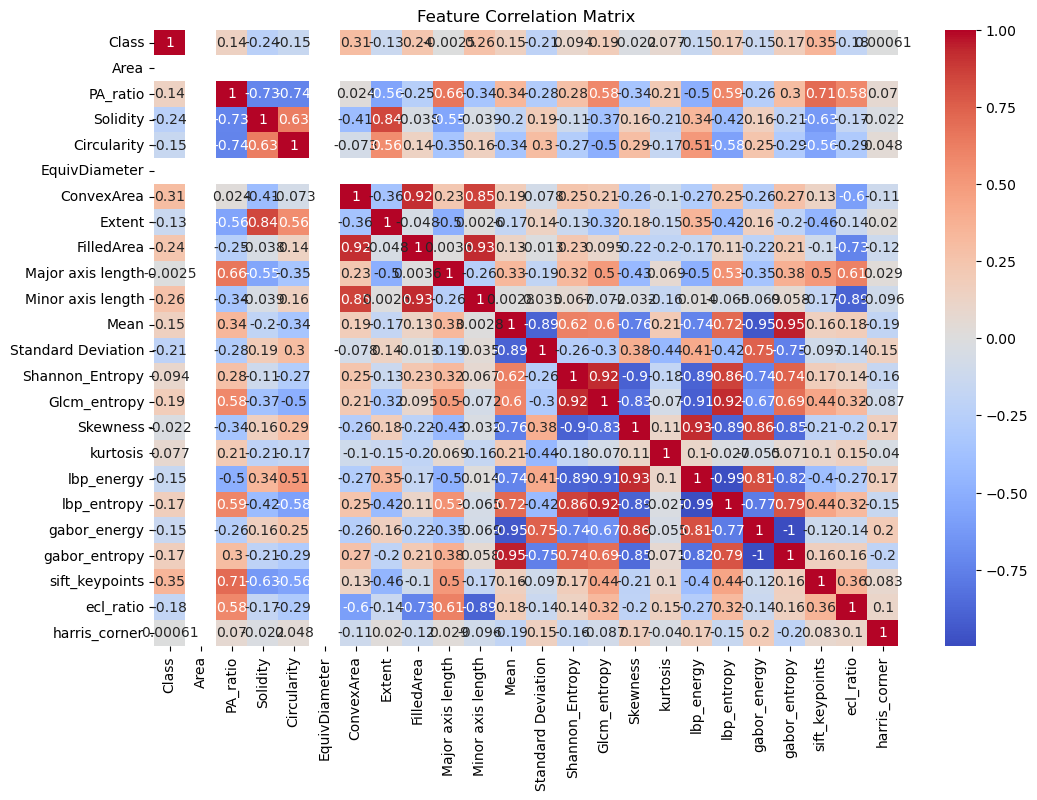

Feature-Class Correlations:
Class                 1.000000
sift_keypoints        0.352129
ConvexArea            0.305848
Minor axis length     0.259481
FilledArea            0.241858
Glcm_entropy          0.185168
lbp_entropy           0.167453
gabor_entropy         0.165474
Mean                  0.150640
PA_ratio              0.143003
Shannon_Entropy       0.093955
kurtosis              0.077324
harris_corner         0.000607
Major axis length    -0.002518
Skewness             -0.022182
Extent               -0.131536
gabor_energy         -0.145494
lbp_energy           -0.150289
Circularity          -0.153879
ecl_ratio            -0.179291
Standard Deviation   -0.214964
Solidity             -0.238891
Area                       NaN
EquivDiameter              NaN
Name: Class, dtype: float64


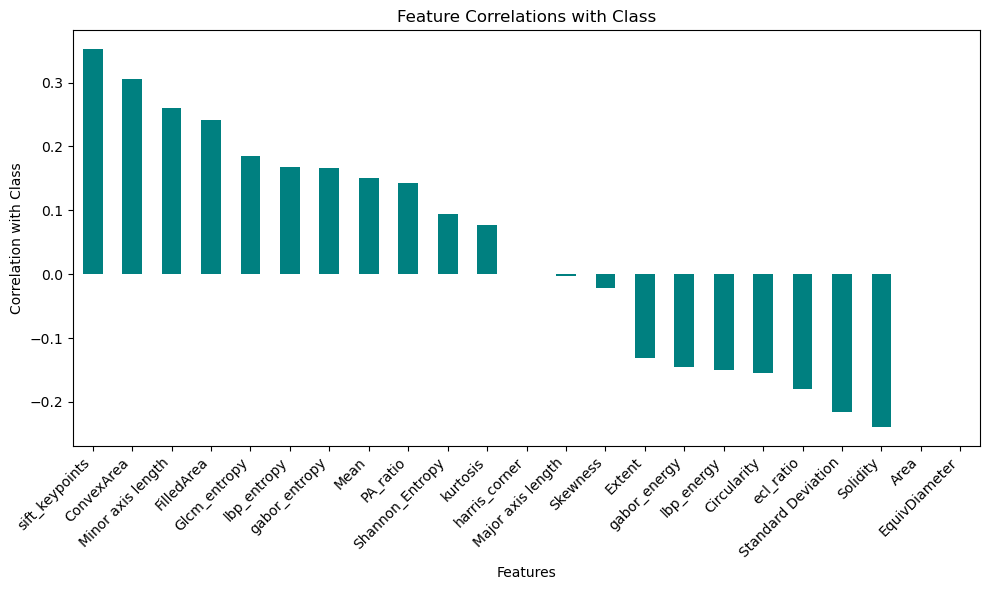

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

csv_path = base_path + '/extracted_features.csv' 
# Load your CSV data
df = pd.read_csv(csv_path)

# Compute the correlation matrix (includes 'Class' since it's numeric)
corr_matrix = df.corr()

# Visualize the full correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Compute correlations of features with 'Class'
class_corr = corr_matrix['Class'].sort_values(ascending=False)

positive_features = class_corr[class_corr > 0].index

# Filter the original dataframe to include only positively correlated features and 'Class'
positive_corr_data = df[positive_features]

# Save the filtered data to a new CSV file
positive_corr_data.to_csv(base_path + '/' + 'positive_correlated_data.csv', index=False)

# Print and visualize correlations with 'Class'
print("Feature-Class Correlations:")
print(class_corr)

# Plot correlation of features with 'Class'
plt.figure(figsize=(10, 6))
class_corr.drop('Class').plot(kind='bar', color='teal')
plt.title('Feature Correlations with Class')
plt.xlabel('Features')
plt.ylabel('Correlation with Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Feature Selection (Anova testing)

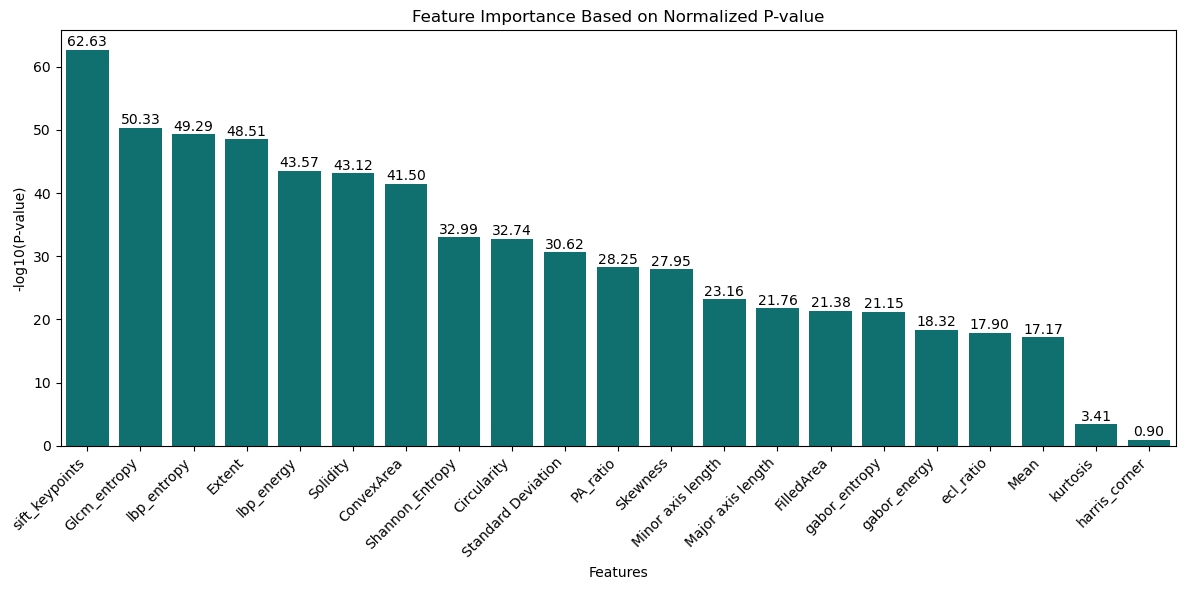

Feature P-values visualization with normalized values and sorting completed.


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif
import numpy as np

# File path
csv_path = base_path + '/extracted_features.csv' 

# Load the dataset
df = pd.read_csv(csv_path)

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Identify constant features
constant_features = X.columns[X.nunique() == 1]

# Remove constant features
X = X.drop(columns=constant_features)

# Perform ANOVA (Analysis of Variance) - f_classif
f_values, p_values = f_classif(X, y)

# Create a DataFrame for ANOVA results
anova_results = pd.DataFrame({
    'Feature': X.columns,
    'F_value': f_values,
    'P_value': p_values
})

# Normalize P-values for better visualization
anova_results['Normalized_P_value'] = -np.log10(anova_results['P_value'])

# Sort by normalized P-values
anova_results_sorted = anova_results.sort_values(by='Normalized_P_value', ascending=False)

# Visualization showing all features with normalized P-values
# Visualization showing all features with normalized P-values
plt.figure(figsize=(12, 6))

# Create the barplot
ax = sns.barplot(x='Feature', y='Normalized_P_value', data=anova_results_sorted, color='teal')

# Annotate each bar with its value
for p in ax.patches:  # Iterate through each bar
    height = p.get_height()  # Get the height of the bar
    ax.text(
        p.get_x() + p.get_width() / 2,  # x-coordinate: center of the bar
        height + 0.1,  # y-coordinate: slightly above the bar
        f'{height:.2f}',  # Format the value (e.g., 2 decimal places)
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance Based on Normalized P-value')
plt.ylabel('-log10(P-value)')
plt.xlabel('Features')
plt.tight_layout()

# Show the plot
plt.show()

print("Feature P-values visualization with normalized values and sorting completed.")


In [193]:
# Select features with a P-value < 0.05 (statistically significant)
selected_features = anova_results[anova_results_sorted['Normalized_P_value'] > 25]['Feature']

# Filter the original dataset to include only selected features
selected_data = df[selected_features.tolist() + ['Class']]

# Save the selected features into a new CSV file
selected_data.to_csv('anova_selected_features.csv', index=False)

print("Selected features saved to 'selected_features.csv'.")


Selected features saved to 'selected_features.csv'.


/var/folders/1z/s3cwv2ws1yz2zdf0rx29c65m0000gn/T/ipykernel_32820/1412740541.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  selected_features = anova_results[anova_results_sorted['Normalized_P_value'] > 25]['Feature']


### Model GCN

In [399]:
import os
import pandas as pd
import torch
from torch_geometric.data import Dataset, Data
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx

class ProcessDataset(Dataset):
    def __init__(self, root, filename, k=5, transform=None, pre_transform=None):
        self.filename = filename
        self.k = k  # Number of neighbors for KNN
        super(ProcessDataset, self).__init__(root, transform, pre_transform)

    @property
    def raw_file_names(self):
        return [self.filename]

    @property
    def processed_file_names(self):
        return 'data.pt'

    def download(self):
        pass

    def process(self):
        # Load CSV data
        data = pd.read_csv(self.filename)

        # Perform min-max scaling on numeric columns
        numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
        scaler = MinMaxScaler()
        data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

        # Extract node features (excluding the 'Class' column)
        node_features = torch.tensor(data.drop(columns=['Class']).values, dtype=torch.float)

        # Assuming 'Class' is the target column
        labels = torch.tensor(data['Class'].values, dtype=torch.long)

        # Construct edge indices using KNN and cosine similarity
        edge_index = self._compute_knn_edges(node_features, k=self.k)

        # Create a single data object for the entire dataset
        graph_data = Data(x=node_features, edge_index=edge_index, y=labels)

        # Save processed data
        torch.save(graph_data, os.path.join(self.processed_dir, 'data.pt'))

        # Return data for visualization
        return edge_index, node_features

    def _compute_knn_edges(self, features, k=5):
        # Convert features to numpy array
        features_np = features.numpy()

        # Create a K-nearest neighbors graph
        knn_graph = kneighbors_graph(features_np, n_neighbors=k, mode='connectivity', include_self=False)

        # Calculate cosine similarity
        cos_sim = cosine_similarity(features_np)

        # Convert the KNN graph to an adjacency matrix
        adj_matrix = knn_graph.toarray()

        # Create a NetworkX graph from the adjacency matrix
        G = nx.from_numpy_array(adj_matrix)

        # Set edge weights based on cosine similarity
        for i, j in G.edges():
            G[i][j]['weight'] = cos_sim[i, j]

        # Convert the graph edges to a list of edge indices
        edge_index = torch.tensor(list(G.edges()), dtype=torch.long).t().contiguous()
        return edge_index

    def get(self, idx):
        data = torch.load(os.path.join(self.processed_dir, 'data.pt'))
        return data

    def len(self):
        # Return the number of samples in the dataset
        return len(pd.read_csv(self.filename))

In [244]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(edge_index, node_features, num_nodes=100):
    # Create a NetworkX graph from edge index
    G = nx.Graph()
    edge_list = edge_index.t().tolist()
    G.add_edges_from(edge_list)

    # Select a subgraph containing the first `num_nodes`
    subgraph_nodes = list(G.nodes())[:num_nodes]
    G_sub = G.subgraph(subgraph_nodes)

    # Visualize the subgraph with node labels
    plt.figure(figsize=(10, 6))
    nx.draw(G_sub, with_labels=True, font_size=8, node_size=50, node_color='lightblue', edge_color='gray')
    plt.title(f"Graph Visualization with KNN Edges (First {num_nodes} Nodes)")
    plt.show()

In [246]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import torch

def visualize_graph_with_features(edge_index, node_features, num_nodes=100):
    # Create a NetworkX graph from edge index
    G = nx.Graph()
    edge_list = edge_index.t().tolist()
    G.add_edges_from(edge_list)

    # Randomly select `num_nodes` nodes
    selected_nodes = np.random.choice(G.nodes(), num_nodes, replace=False)
    G_sub = G.subgraph(selected_nodes)

    # If node features are provided, normalize them for color mapping
    if node_features is not None:
        feature_dim = node_features.size(1)
        feature_values = node_features[:num_nodes, 0].numpy() if feature_dim > 0 else None  # Use the first feature

        # Normalize feature values for color mapping
        if feature_values is not None:
            normalized_features = (feature_values - feature_values.min()) / (feature_values.ptp() + 1e-8)
        else:
            normalized_features = None
    else:
        normalized_features = None

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))
    pos = nx.spring_layout(G_sub)  # Position the nodes using a force-directed layout

    # Use node features to set the node color
    if normalized_features is not None:
        node_colors = normalized_features  # Set node colors based on features
        nx.draw(
            G_sub, pos, ax=ax, with_labels=True, font_size=8, node_size=200,
            node_color=node_colors, cmap='viridis', edge_color='gray'
        )
        
        # Add color bar
        sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=feature_values.min(), vmax=feature_values.max()))
        sm.set_array([])  # This prevents a warning
        cbar = fig.colorbar(sm, ax=ax)  # Associate the colorbar with the specific axis
        cbar.set_label('Node Feature Value')
    else:
        nx.draw(
            G_sub, pos, ax=ax, with_labels=True, font_size=8, node_size=200,
            node_color='lightblue', edge_color='gray'
        )
    
    plt.title(f"Graph Visualization with Randomly Selected {num_nodes} Nodes")
    plt.show()

In [248]:
import os
import pandas as pd
import torch
from torch_geometric.data import Dataset, Data, DataLoader
from torch_geometric.nn import GCNConv
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split
import traceback
import matplotlib.pyplot as plt
from torch_geometric.explain import GNNExplainer

# Define the GCN model
class GCNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCNModel, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = x.unsqueeze(0) if x.dim() == 1 else x  # Add a batch dimension if missing
        edge_index = edge_index.to(torch.long)    # Convert edge_index to torch.long

        try:
            x = F.relu(self.conv1(x, edge_index))
            x = self.dropout(x)
            x = self.conv2(x, edge_index)
        except Exception as e:
            print("An exception occurred:", e)
            traceback.print_exc()
        return F.log_softmax(x, dim=1)

In [320]:
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_on_test_set(model, loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for data in loader:
            out = model(data)
            pred = out.argmax(dim=1)
            all_preds.extend(pred.cpu().numpy())
            all_labels.extend(data.y.cpu().numpy())
    return all_preds, all_labels

def plot_confusion_matrix(labels, preds, class_names):
    cm = confusion_matrix(labels, preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

def plot_roc_curve(labels, preds, num_classes):
    fpr = {}
    tpr = {}
    roc_auc = {}

    labels = np.array(labels)
    preds = np.array(preds)

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(labels == i, preds == i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 8))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

In [313]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import KFold

def train_test(model, train_loader, test_loader, optimizer, criterion, epochs):
    train_losses = []  # To store training losses for visualization
    test_losses = []  # To store test losses
    train_accuracies = []  # To store training accuracies
    test_accuracies = []  # To store test accuracies
    f1_scores = []
    all_preds, all_targets = [], []  # Collect predictions and targets for classification metrics

    for epoch in range(1, epochs + 1):
        # Training phase
        model.train()
        running_train_loss = 0.0
        correct_train = 0
        total_train = 0

        for data in train_loader:
            optimizer.zero_grad()
            out = model(data)
            loss = criterion(out, data.y)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item() * data.num_graphs
            
            # Accuracy calculation for training
            pred = out.argmax(dim=1)
            correct_train += pred.eq(data.y).sum().item()
            total_train += data.y.size(0)
            
            # all_preds.extend(pred.cpu().numpy())
            # all_targets.extend(data.y.cpu().numpy())

        train_loss = running_train_loss / len(train_loader.dataset)
        train_acc = correct_train / total_train
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)

        # Test phase
        model.eval()
        test_loss = 0.0
        correct_test = 0
        total_test = 0

        with torch.no_grad():
            for data in test_loader:
                out = model(data)
                loss = criterion(out, data.y)
                test_loss += loss.item() * data.num_graphs

                # Accuracy calculation for testing
                pred = out.argmax(dim=1)
                correct_test += pred.eq(data.y).sum().item()
                total_test += data.y.size(0)
                
                all_preds.extend(pred.cpu().numpy())
                all_targets.extend(data.y.cpu().numpy())

        test_loss /= len(test_loader.dataset)
        test_acc = correct_test / total_test
        test_losses.append(test_loss)
        test_accuracies.append(test_acc)

        # Compute F1 Score and Sensitivity
        f1 = f1_score(all_targets, all_preds, average='weighted')
        sensitivity = recall_score(all_targets, all_preds, average='weighted',  zero_division=0)  # Set recall/precision to 0 for classes with no true samples)
        f1_scores.append(f1)
        
        print(f'Epoch [{epoch}/{epochs}], Training Loss: {train_loss:.4f}, Training Accuracy: {train_acc * 100:.2f}%, '
              f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}, '
              f'Test F1 Score: {f1:.4f}, Test Sensitivity: {sensitivity:.4f}')

    # Visualize the training, validation, and testing losses and accuracies
    plt.figure(figsize=(12, 4))

    # Loss plots
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')

    plt.plot(test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Across Epochs')
    plt.legend(fontsize=5)
    # Accuracy plots
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(test_accuracies, label='Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Across Epochs')
    plt.legend(fontsize=5)

    # # F1 Score plot
    # plt.subplot(1, 2, 3)
    # plt.plot(f1_scores, label='F1 Score')
    # plt.xlabel('Epoch')
    # plt.ylabel('F1 Score')
    # plt.title('F1 Score Across Epochs')
    # plt.legend(fontsize=5)

    # plt.tight_layout()
    plt.savefig("loss_accuracy_curve.png", dpi=700)
    plt.show()


In [419]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

def train_validate_test(model, train_loader, val_loader, test_loader, optimizer, criterion, epochs):
    train_losses = []  # To store training losses for visualization
    val_losses = []  # To store validation losses for visualization
    test_losses = []  # To store test losses
    train_accuracies = []  # To store training accuracies
    val_accuracies = []  # To store validation accuracies
    test_accuracies = []  # To store test accuracies
    f1_scores = []
    all_preds, all_targets = [], []  # Collect predictions and targets for classification metrics

    for epoch in range(1, epochs + 1):
        # Training phase
        model.train()
        running_train_loss = 0.0
        correct_train = 0
        total_train = 0

        for data in train_loader:
            optimizer.zero_grad()
            out = model(data)
            loss = criterion(out, data.y)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item() * data.num_graphs
            
            # Accuracy calculation for training
            pred = out.argmax(dim=1)
            correct_train += pred.eq(data.y).sum().item()
            total_train += data.y.size(0)
            
            # all_preds.extend(pred.cpu().numpy())
            # all_targets.extend(data.y.cpu().numpy())

        train_loss = running_train_loss / len(train_loader.dataset)
        train_acc = correct_train / total_train
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)

        # Validation phase
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for data in val_loader:
                out = model(data)
                loss = criterion(out, data.y)
                val_loss += loss.item() * data.num_graphs

                # Accuracy calculation for validation
                pred = out.argmax(dim=1)
                correct_val += pred.eq(data.y).sum().item()
                total_val += data.y.size(0)
                
                # all_preds.extend(pred.cpu().numpy())
                # all_targets.extend(data.y.cpu().numpy())

        val_loss /= len(val_loader.dataset)
        val_acc = correct_val / total_val
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        # Test phase
        model.eval()
        test_loss = 0.0
        correct_test = 0
        total_test = 0

        with torch.no_grad():
            for data in test_loader:
                out = model(data)
                loss = criterion(out, data.y)
                test_loss += loss.item() * data.num_graphs

                # Accuracy calculation for testing
                pred = out.argmax(dim=1)
                correct_test += pred.eq(data.y).sum().item()
                total_test += data.y.size(0)
                
                all_preds.extend(pred.cpu().numpy())
                all_targets.extend(data.y.cpu().numpy())

        test_loss /= len(test_loader.dataset)
        test_acc = correct_test / total_test
        test_losses.append(test_loss)
        test_accuracies.append(test_acc)

        # Compute F1 Score and Sensitivity
        f1 = f1_score(all_targets, all_preds, average='weighted')
        sensitivity = recall_score(all_targets, all_preds, average='weighted')
        f1_scores.append(f1)
        
        print(f'Epoch [{epoch}/{epochs}], Training Loss: {train_loss:.4f}, Training Accuracy: {train_acc * 100:.2f}%, '
              f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc * 100:.2f}%, '
              f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%, '
              f'Test F1 Score: {f1:.4f}, Test Sensitivity: {sensitivity:.4f}')

    # Visualize the training, validation, and testing losses and accuracies
    plt.figure(figsize=(12, 4))

    # Loss plots
    plt.subplot(1, 3, 1)
    plt.plot(train_losses, label='Training Loss')
    # plt.plot(val_losses, label='Validation Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Across Epochs')
    plt.legend(fontsize=5)

    # Accuracy plots
    plt.subplot(1, 3, 2)
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.plot(test_accuracies, label='Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Across Epochs')
    plt.legend(fontsize=5)

    # F1 Score plot
    plt.subplot(1, 3, 3)
    plt.plot(f1_scores, label='F1 Score')
    plt.xlabel('Epoch')
    plt.ylabel('F1 Score')
    plt.title('F1 Score Across Epochs')
    plt.legend(fontsize=5)

    plt.tight_layout()
    plt.savefig("loss_accuracy_curve.png", dpi=700)
    plt.show()


Processing...
Done!


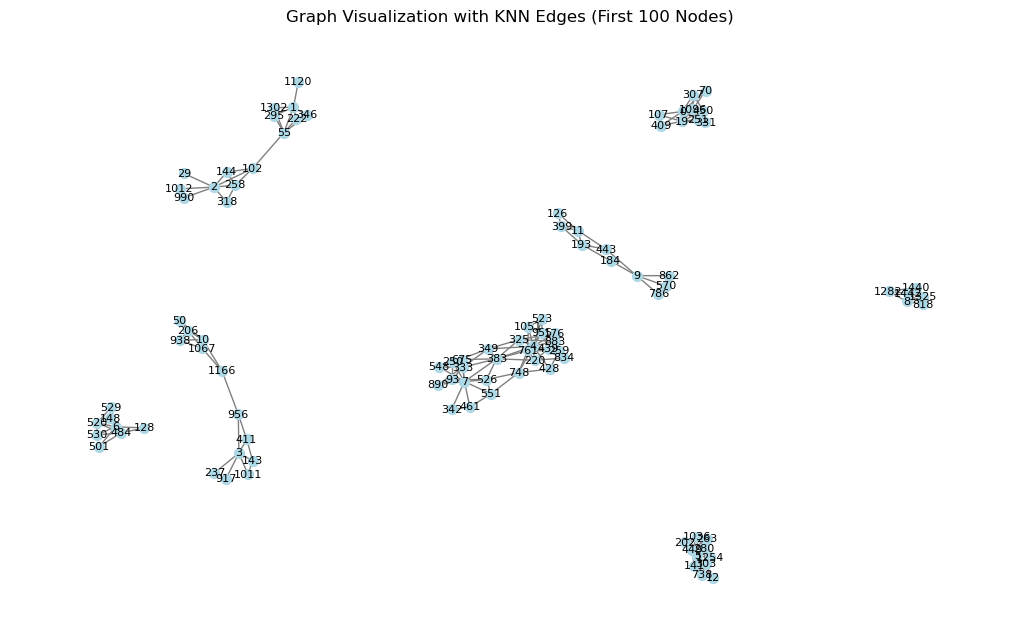

torch.Size([1464, 12])
torch.Size([2, 5167])


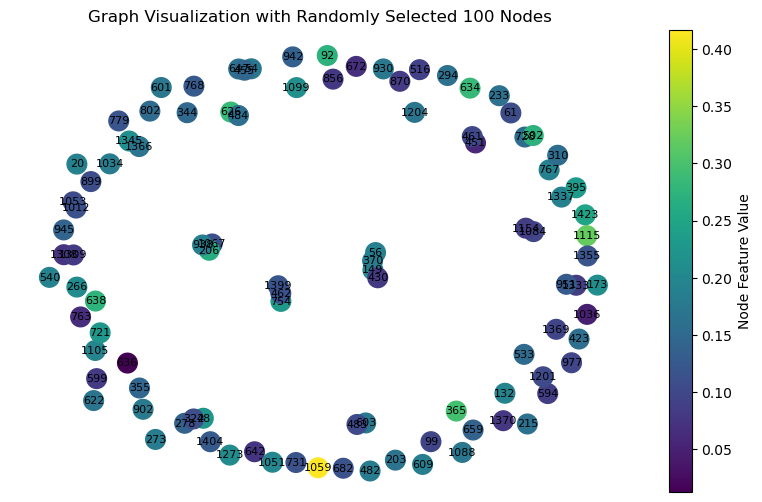

In [403]:
# from torch.utils.data import DataLoader, random_split

# # Assuming `dataset` is your dataset
# data_file = base_path + '/extracted_features.csv' 
data_file = base_path + '/positive_correlated_data.csv'
# data_file = base_path + '/anova_selected_features.csv'
# csv_path = base_path + '/extracted_features.csv' 
dataset = ProcessDataset(root=base_path, filename=data_file, k=5)

# Process the dataset and get edge_index, node_features for visualization
edge_index, node_features = dataset.process()


# Call the visualization function for the first 100 nodes
visualize_graph(edge_index, node_features, num_nodes=100)
print(node_features.size())
print(edge_index.size())
visualize_graph_with_features(edge_index, node_features, num_nodes=100)

/opt/anaconda3/lib/python3.12/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)



Fold 1
Epoch [1/50], Training Loss: 0.7137, Training Accuracy: 78.12%, Test Loss: 0.4771, Test Accuracy: 0.86, Test F1 Score: 0.7943, Test Sensitivity: 0.8593
Epoch [2/50], Training Loss: 0.4669, Training Accuracy: 85.77%, Test Loss: 0.4202, Test Accuracy: 0.86, Test F1 Score: 0.7943, Test Sensitivity: 0.8593
Epoch [3/50], Training Loss: 0.4113, Training Accuracy: 85.84%, Test Loss: 0.3709, Test Accuracy: 0.86, Test F1 Score: 0.7943, Test Sensitivity: 0.8593
Epoch [4/50], Training Loss: 0.3603, Training Accuracy: 86.01%, Test Loss: 0.3228, Test Accuracy: 0.87, Test F1 Score: 0.8047, Test Sensitivity: 0.8620
Epoch [5/50], Training Loss: 0.3187, Training Accuracy: 87.11%, Test Loss: 0.2937, Test Accuracy: 0.88, Test F1 Score: 0.8168, Test Sensitivity: 0.8650
Epoch [6/50], Training Loss: 0.2962, Training Accuracy: 87.80%, Test Loss: 0.2785, Test Accuracy: 0.88, Test F1 Score: 0.8276, Test Sensitivity: 0.8682
Epoch [7/50], Training Loss: 0.2841, Training Accuracy: 88.16%, Test Loss: 0.269

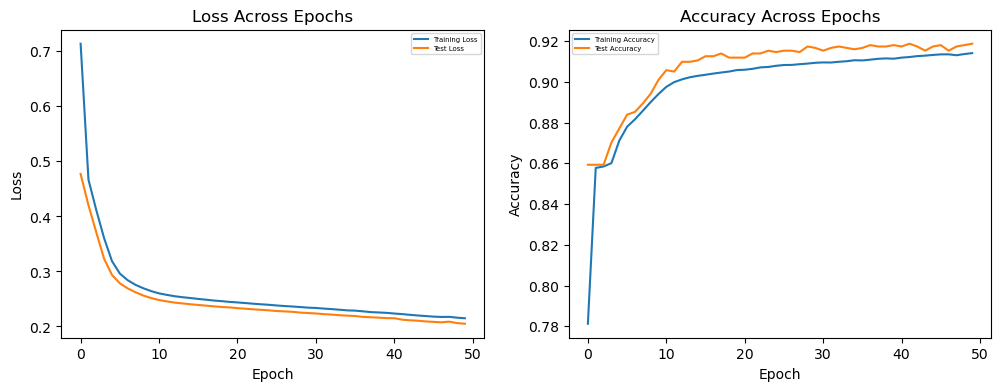

/opt/anaconda3/lib/python3.12/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)



Fold 2
Epoch [1/50], Training Loss: 0.7334, Training Accuracy: 76.51%, Test Loss: 0.4732, Test Accuracy: 0.86, Test F1 Score: 0.7943, Test Sensitivity: 0.8593
Epoch [2/50], Training Loss: 0.4566, Training Accuracy: 85.51%, Test Loss: 0.4141, Test Accuracy: 0.86, Test F1 Score: 0.7943, Test Sensitivity: 0.8593
Epoch [3/50], Training Loss: 0.4064, Training Accuracy: 85.67%, Test Loss: 0.3608, Test Accuracy: 0.86, Test F1 Score: 0.7943, Test Sensitivity: 0.8593
Epoch [4/50], Training Loss: 0.3565, Training Accuracy: 86.03%, Test Loss: 0.3168, Test Accuracy: 0.87, Test F1 Score: 0.8046, Test Sensitivity: 0.8624
Epoch [5/50], Training Loss: 0.3177, Training Accuracy: 87.25%, Test Loss: 0.2906, Test Accuracy: 0.88, Test F1 Score: 0.8176, Test Sensitivity: 0.8664
Epoch [6/50], Training Loss: 0.2956, Training Accuracy: 87.85%, Test Loss: 0.2757, Test Accuracy: 0.88, Test F1 Score: 0.8277, Test Sensitivity: 0.8691
Epoch [7/50], Training Loss: 0.2826, Training Accuracy: 88.25%, Test Loss: 0.266

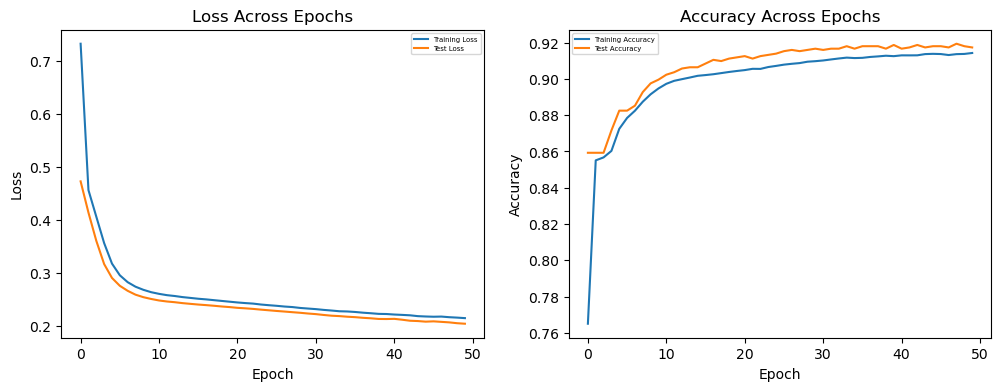

/opt/anaconda3/lib/python3.12/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)



Fold 3
Epoch [1/50], Training Loss: 0.7385, Training Accuracy: 75.75%, Test Loss: 0.4643, Test Accuracy: 0.86, Test F1 Score: 0.7943, Test Sensitivity: 0.8593
Epoch [2/50], Training Loss: 0.4559, Training Accuracy: 85.40%, Test Loss: 0.4083, Test Accuracy: 0.86, Test F1 Score: 0.7943, Test Sensitivity: 0.8593
Epoch [3/50], Training Loss: 0.4045, Training Accuracy: 85.56%, Test Loss: 0.3577, Test Accuracy: 0.86, Test F1 Score: 0.7943, Test Sensitivity: 0.8593
Epoch [4/50], Training Loss: 0.3541, Training Accuracy: 86.13%, Test Loss: 0.3151, Test Accuracy: 0.87, Test F1 Score: 0.8043, Test Sensitivity: 0.8624
Epoch [5/50], Training Loss: 0.3160, Training Accuracy: 87.26%, Test Loss: 0.2880, Test Accuracy: 0.88, Test F1 Score: 0.8187, Test Sensitivity: 0.8658
Epoch [6/50], Training Loss: 0.2937, Training Accuracy: 87.90%, Test Loss: 0.2741, Test Accuracy: 0.88, Test F1 Score: 0.8294, Test Sensitivity: 0.8690
Epoch [7/50], Training Loss: 0.2812, Training Accuracy: 88.30%, Test Loss: 0.265

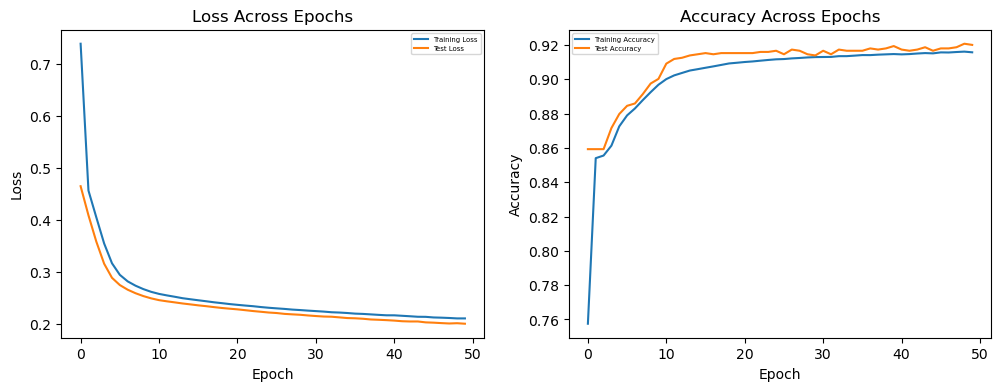

/opt/anaconda3/lib/python3.12/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)



Fold 4
Epoch [1/50], Training Loss: 0.7060, Training Accuracy: 77.99%, Test Loss: 0.4950, Test Accuracy: 0.86, Test F1 Score: 0.7943, Test Sensitivity: 0.8593
Epoch [2/50], Training Loss: 0.4723, Training Accuracy: 85.53%, Test Loss: 0.4329, Test Accuracy: 0.86, Test F1 Score: 0.7943, Test Sensitivity: 0.8593
Epoch [3/50], Training Loss: 0.4229, Training Accuracy: 85.74%, Test Loss: 0.3879, Test Accuracy: 0.86, Test F1 Score: 0.7943, Test Sensitivity: 0.8593
Epoch [4/50], Training Loss: 0.3770, Training Accuracy: 85.92%, Test Loss: 0.3406, Test Accuracy: 0.86, Test F1 Score: 0.8007, Test Sensitivity: 0.8607
Epoch [5/50], Training Loss: 0.3362, Training Accuracy: 86.73%, Test Loss: 0.3087, Test Accuracy: 0.88, Test F1 Score: 0.8108, Test Sensitivity: 0.8638
Epoch [6/50], Training Loss: 0.3081, Training Accuracy: 87.49%, Test Loss: 0.2868, Test Accuracy: 0.88, Test F1 Score: 0.8219, Test Sensitivity: 0.8662
Epoch [7/50], Training Loss: 0.2910, Training Accuracy: 87.91%, Test Loss: 0.274

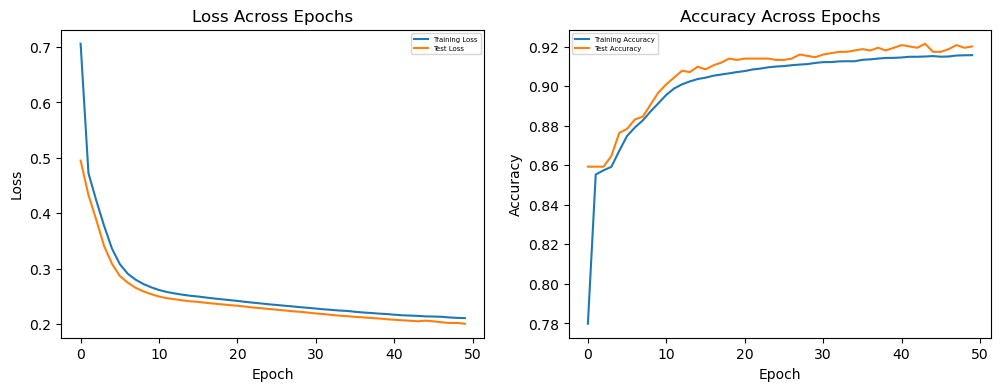

/opt/anaconda3/lib/python3.12/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)



Fold 5
Epoch [1/50], Training Loss: 0.7274, Training Accuracy: 77.65%, Test Loss: 0.4892, Test Accuracy: 0.86, Test F1 Score: 0.7943, Test Sensitivity: 0.8593
Epoch [2/50], Training Loss: 0.4711, Training Accuracy: 85.49%, Test Loss: 0.4300, Test Accuracy: 0.86, Test F1 Score: 0.7943, Test Sensitivity: 0.8593
Epoch [3/50], Training Loss: 0.4255, Training Accuracy: 85.68%, Test Loss: 0.3856, Test Accuracy: 0.86, Test F1 Score: 0.7943, Test Sensitivity: 0.8593
Epoch [4/50], Training Loss: 0.3790, Training Accuracy: 85.89%, Test Loss: 0.3405, Test Accuracy: 0.86, Test F1 Score: 0.7993, Test Sensitivity: 0.8605
Epoch [5/50], Training Loss: 0.3370, Training Accuracy: 86.78%, Test Loss: 0.3069, Test Accuracy: 0.88, Test F1 Score: 0.8096, Test Sensitivity: 0.8635
Epoch [6/50], Training Loss: 0.3080, Training Accuracy: 87.50%, Test Loss: 0.2850, Test Accuracy: 0.88, Test F1 Score: 0.8206, Test Sensitivity: 0.8665
Epoch [7/50], Training Loss: 0.2902, Training Accuracy: 87.97%, Test Loss: 0.271

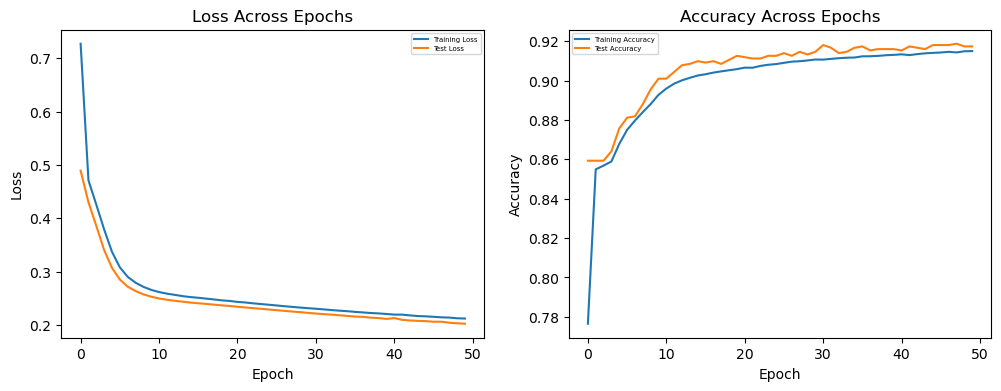

In [332]:
dataset_list = list(dataset)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
all_preds = []
all_labels = []

for fold, (train_idx, test_idx) in enumerate(kf.split(dataset_list)):
    train_subset = [dataset_list[i] for i in train_idx]
    test_subset = [dataset_list[i] for i in test_idx]

    train_loader = DataLoader(train_subset, batch_size=128, shuffle=True)
    test_loader = DataLoader(test_subset, batch_size=128, shuffle=False)

    model = GCNModel(input_dim=dataset.num_node_features, hidden_dim=128, output_dim=4)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    criterion = nn.NLLLoss()

    print(f"\nFold {fold + 1}")
    train_test(model, train_loader, test_loader, optimizer, criterion, epochs=50)
    preds, labels = evaluate_on_test_set(model, test_loader)
    all_preds.extend(preds)
    all_labels.extend(labels)

/opt/anaconda3/lib/python3.12/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/50], Training Loss: 0.7108, Training Accuracy: 77.37%, Validation Loss: 0.4754, Validation Accuracy: 85.93%, Test Loss: 0.4754, Test Accuracy: 0.86%, Test F1 Score: 0.7943, Test Sensitivity: 0.8593
Epoch [2/50], Training Loss: 0.4557, Training Accuracy: 85.68%, Validation Loss: 0.4107, Validation Accuracy: 85.93%, Test Loss: 0.4107, Test Accuracy: 0.86%, Test F1 Score: 0.7943, Test Sensitivity: 0.8593
Epoch [3/50], Training Loss: 0.3978, Training Accuracy: 85.74%, Validation Loss: 0.3501, Validation Accuracy: 85.93%, Test Loss: 0.3501, Test Accuracy: 0.86%, Test F1 Score: 0.7943, Test Sensitivity: 0.8593
Epoch [4/50], Training Loss: 0.3423, Training Accuracy: 86.40%, Validation Loss: 0.3041, Validation Accuracy: 88.18%, Test Loss: 0.3041, Test Accuracy: 0.88%, Test F1 Score: 0.8109, Test Sensitivity: 0.8649
Epoch [5/50], Training Loss: 0.3060, Training Accuracy: 87.68%, Validation Loss: 0.2822, Validation Accuracy: 88.25%, Test Loss: 0.2822, Test Accuracy: 0.88%, Test F1 Score

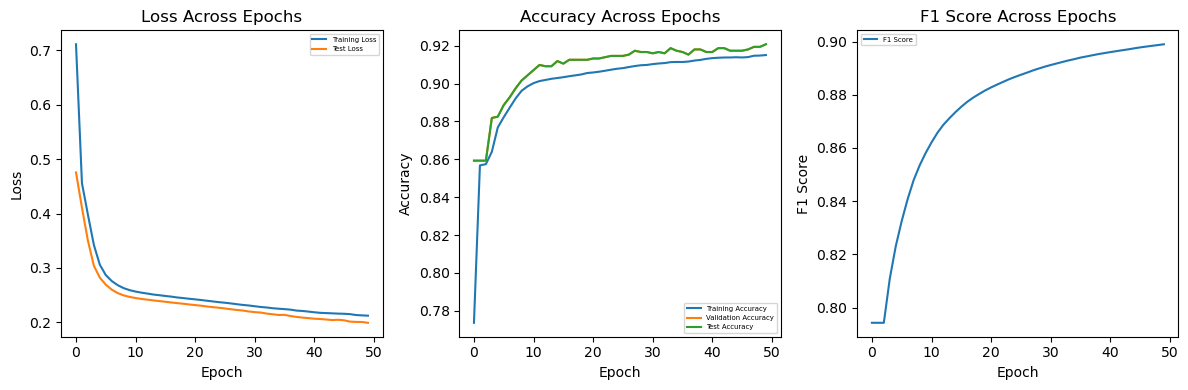

In [423]:
# # 80% for training, 10% for validation, and 10% for testing
train_size = int(0.80 * len(dataset))
val_size = int(0.10 * len(dataset))
test_size = len(dataset) - train_size - val_size

# Split the dataset into train, validation, and test sets
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Create DataLoader objects for train, validation, and test sets
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Initialize the model
model = GCNModel(input_dim=dataset.num_node_features, hidden_dim=128, output_dim=4)

# Specify loss function and optimizer
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train the model with the updated function
train_validate_test(model, train_loader, val_loader, test_loader, optimizer, criterion, epochs=50)


### Model GNN

In [198]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from torch_geometric.data import Data
from torch_geometric.nn import SAGEConv, BatchNorm
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
# Define a Base GNN model
class ModelGNN(torch.nn.Module):
    def __init__(self, num_features, hidden_channels, num_classes):
        super(ModelGNN, self).__init__()
        self.conv1 = SAGEConv(num_features, hidden_channels)
        self.bn1 = BatchNorm(hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, hidden_channels)
        self.bn2 = BatchNorm(hidden_channels)
        self.conv3 = SAGEConv(hidden_channels, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.conv2(x, edge_index)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.conv3(x, edge_index)
        return x


/opt/anaconda3/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 0, Loss: 1.6743
Train Accuracy: 0.4051, Validation Accuracy: 0.3605, Test Accuracy: 0.4150
Test Sensitivity (Recall Weighted): 0.4150, Test F1-Score: 0.3613
Epoch 1, Loss: 2.8518
Train Accuracy: 0.4376, Validation Accuracy: 0.4014, Test Accuracy: 0.4694
Test Sensitivity (Recall Weighted): 0.4694, Test F1-Score: 0.4751
Epoch 2, Loss: 1.9156
Train Accuracy: 0.1949, Validation Accuracy: 0.1905, Test Accuracy: 0.2041
Test Sensitivity (Recall Weighted): 0.2041, Test F1-Score: 0.1682
Epoch 3, Loss: 1.5658
Train Accuracy: 0.2658, Validation Accuracy: 0.2449, Test Accuracy: 0.2109
Test Sensitivity (Recall Weighted): 0.2109, Test F1-Score: 0.1283


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 4, Loss: 1.4403
Train Accuracy: 0.3051, Validation Accuracy: 0.2857, Test Accuracy: 0.2789
Test Sensitivity (Recall Weighted): 0.2789, Test F1-Score: 0.1992
Epoch 5, Loss: 1.2450
Train Accuracy: 0.4282, Validation Accuracy: 0.4150, Test Accuracy: 0.4490
Test Sensitivity (Recall Weighted): 0.4490, Test F1-Score: 0.3724
Epoch 6, Loss: 1.1592
Train Accuracy: 0.3974, Validation Accuracy: 0.3946, Test Accuracy: 0.4490
Test Sensitivity (Recall Weighted): 0.4490, Test F1-Score: 0.4235
Epoch 7, Loss: 1.0813
Train Accuracy: 0.3393, Validation Accuracy: 0.3401, Test Accuracy: 0.3673
Test Sensitivity (Recall Weighted): 0.3673, Test F1-Score: 0.3651
Epoch 8, Loss: 1.0955
Train Accuracy: 0.3402, Validation Accuracy: 0.3401, Test Accuracy: 0.3537
Test Sensitivity (Recall Weighted): 0.3537, Test F1-Score: 0.3420
Epoch 9, Loss: 1.0760
Train Accuracy: 0.3752, Validation Accuracy: 0.3401, Test Accuracy: 0.3878
Test Sensitivity (Recall Weighted): 0.3878, Test F1-Score: 0.3641
Epoch 10, Loss: 0.9984

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 12, Loss: 0.9443
Train Accuracy: 0.4470, Validation Accuracy: 0.4354, Test Accuracy: 0.4898
Test Sensitivity (Recall Weighted): 0.4898, Test F1-Score: 0.4441
Epoch 13, Loss: 0.9022
Train Accuracy: 0.4675, Validation Accuracy: 0.4626, Test Accuracy: 0.5102
Test Sensitivity (Recall Weighted): 0.5102, Test F1-Score: 0.4711
Epoch 14, Loss: 0.8957
Train Accuracy: 0.4991, Validation Accuracy: 0.4966, Test Accuracy: 0.5170
Test Sensitivity (Recall Weighted): 0.5170, Test F1-Score: 0.4842
Epoch 15, Loss: 0.9040
Train Accuracy: 0.5282, Validation Accuracy: 0.5306, Test Accuracy: 0.5646
Test Sensitivity (Recall Weighted): 0.5646, Test F1-Score: 0.5283
Epoch 16, Loss: 0.8864
Train Accuracy: 0.5675, Validation Accuracy: 0.5442, Test Accuracy: 0.5714
Test Sensitivity (Recall Weighted): 0.5714, Test F1-Score: 0.5440
Epoch 17, Loss: 0.8540
Train Accuracy: 0.5667, Validation Accuracy: 0.5442, Test Accuracy: 0.5782
Test Sensitivity (Recall Weighted): 0.5782, Test F1-Score: 0.5433
Epoch 18, Loss: 

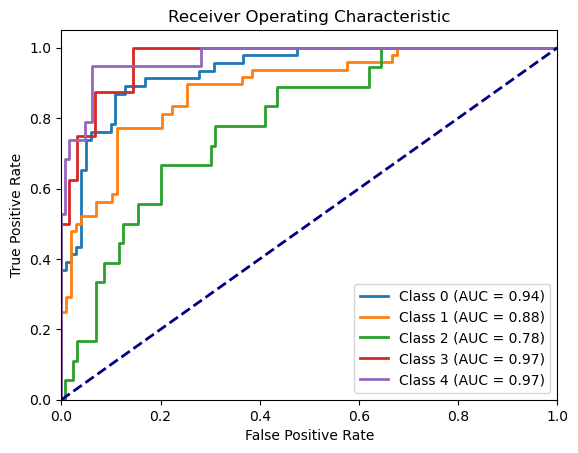

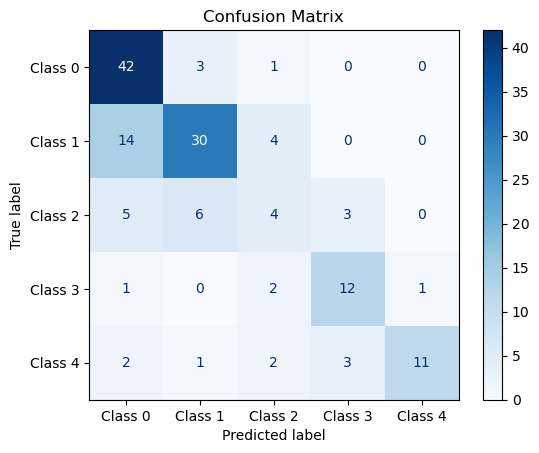

In [204]:

# Load your tabular data
excel_file_path = base_path + '/extracted_features.csv' 
# excel_file_path = base_path + '/positive_correlated_data.csv'
# excel_file_path = base_path +  '/anova_selected_features.csv'

df = pd.read_csv(excel_file_path)

# Assuming your target column is named 'Class'
X = df.drop('Class', axis=1).values  # Features
y = df['Class'].values  # Target variable

# Initialize the MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Apply Log Transformation to the features
X_log_transformed = np.log(X_normalized + 1)  # Adding 1 to avoid log(0)

# Generate a graph based on your features
K = 5  # Number of nearest neighbors to consider
knn = NearestNeighbors(n_neighbors=K, algorithm='ball_tree')
knn.fit(X_log_transformed)  # Use the log-transformed data for graph construction
knn_indices = knn.kneighbors(return_distance=False)

graph = nx.Graph()
for i in range(len(df)):
    graph.add_node(i)
for i, neighbors in enumerate(knn_indices):
    for neighbor in neighbors:
        if i != neighbor:
            graph.add_edge(i, neighbor)

labels = {i: label for i, label in enumerate(y)}
nx.set_node_attributes(graph, labels, 'label')

# Create the PyTorch Geometric Data object for the graph data
edge_index = torch.tensor(np.array(list(graph.edges())).T, dtype=torch.long)
x = torch.tensor(X_log_transformed, dtype=torch.float)
y = torch.tensor(y, dtype=torch.long)
data = Data(x=x, edge_index=edge_index, y=y)

# Create train, validation, and test masks
num_nodes = data.x.size(0)
train_ratio, val_ratio, test_ratio = 0.8, 0.1, 0.1
train_indices, test_indices = train_test_split(range(num_nodes), test_size=test_ratio, random_state=42)
train_indices, val_indices = train_test_split(train_indices, test_size=val_ratio / (train_ratio + val_ratio), random_state=42)

train_mask = torch.zeros(num_nodes, dtype=torch.bool)
val_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)
train_mask[train_indices] = True
val_mask[val_indices] = True
test_mask[test_indices] = True


# Initialize the custom GNN model
hidden_channels = 512
num_classes = len(torch.unique(y))
model = ModelGNN(num_features=x.size(1), hidden_channels=hidden_channels, num_classes=num_classes)

# Define optimizer, loss function, and scheduler
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10, verbose=True)

# Training loop with train-test split
best_val_accuracy = 0.0
best_test_accuracy = 0.0
patience = 50
early_stopping_counter = 0

for epoch in range(50):
    model.train()
    optimizer.zero_grad()

    # Forward pass and loss calculation for training nodes
    out = model(data.x, data.edge_index)
    loss = criterion(out[train_mask], data.y[train_mask])
    loss.backward()
    optimizer.step()

    # Validation and testing
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index)
        y_pred = out.argmax(dim=1)

        train_accuracy = accuracy_score(data.y[train_mask].cpu(), y_pred[train_mask].cpu())
        val_accuracy = accuracy_score(data.y[val_mask].cpu(), y_pred[val_mask].cpu())
        test_accuracy = accuracy_score(data.y[test_mask].cpu(), y_pred[test_mask].cpu())
        precision_weighted, recall_weighted, f1_weighted, _ = precision_recall_fscore_support(data.y[test_mask].cpu(),  y_pred[test_mask].cpu(), average='weighted')

    scheduler.step(loss)

    print(
        f"Epoch {epoch}, Loss: {loss:.4f}\n"
        f"Train Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}\n"
        f"Test Sensitivity (Recall Weighted): {recall_weighted:.4f}, Test F1-Score: {f1_weighted:.4f}"
    )


    # Early stopping based on validation accuracy
    if test_accuracy > best_test_accuracy:
        best_val_accuracy = val_accuracy
        best_test_accuracy = test_accuracy
        early_stopping_counter = 0
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= patience:
            print("Early stopping")
            break

print(f"Best Validation Accuracy: {best_val_accuracy:.4f}, Best Test Accuracy: {best_test_accuracy:.4f}")

# ROC curve and confusion matrix evaluation
model.eval()
with torch.no_grad():
    out = model(data.x, data.edge_index)
    y_scores = out.softmax(dim=1).cpu().numpy()

# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
n_classes = y_scores.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(data.y[test_mask].cpu() == i, y_scores[test_mask, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Confusion matrix
y_true = data.y[test_mask].cpu().numpy()
y_pred = y_pred[test_mask].cpu().numpy()
cm = confusion_matrix(y_true, y_pred)
class_names = [f'Class {i}' for i in range(n_classes)]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()


### Model GAT

In [206]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from torch_geometric.data import Data
from torch_geometric.nn import GATConv, BatchNorm
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
class ModelGAT(torch.nn.Module):
    def __init__(self, num_features, hidden_channels, num_classes):
        super(ModelGAT, self).__init__()
        self.gat1 = GATConv(num_features, hidden_channels, heads=4, dropout=0.4)
        self.bn1 = BatchNorm(hidden_channels * 4)
        self.gat2 = GATConv(hidden_channels * 4, hidden_channels, heads=4, dropout=0.4)
        self.bn2 = BatchNorm(hidden_channels * 4)
        self.gat3 = GATConv(hidden_channels * 4, num_classes, heads=1, concat=False)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x, edge_index):
        x = self.gat1(x, edge_index)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.gat2(x, edge_index)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.gat3(x, edge_index)
        return x


/opt/anaconda3/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 0, Loss: 2.3437
Train Accuracy: 0.3672, Validation Accuracy: 0.3727, Test Accuracy: 0.3864
Test Sensitivity (Recall Weighted): 0.3864, Test F1-Score: 0.3317
Epoch 1, Loss: 2.4133
Train Accuracy: 0.2627, Validation Accuracy: 0.2682, Test Accuracy: 0.2909
Test Sensitivity (Recall Weighted): 0.2909, Test F1-Score: 0.2150


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 2, Loss: 1.9948
Train Accuracy: 0.2393, Validation Accuracy: 0.2273, Test Accuracy: 0.2318
Test Sensitivity (Recall Weighted): 0.2318, Test F1-Score: 0.2116
Epoch 3, Loss: 1.8594
Train Accuracy: 0.3604, Validation Accuracy: 0.3682, Test Accuracy: 0.3864
Test Sensitivity (Recall Weighted): 0.3864, Test F1-Score: 0.3590
Epoch 4, Loss: 1.5356
Train Accuracy: 0.4199, Validation Accuracy: 0.4182, Test Accuracy: 0.4545
Test Sensitivity (Recall Weighted): 0.4545, Test F1-Score: 0.4237
Epoch 5, Loss: 1.5014
Train Accuracy: 0.4688, Validation Accuracy: 0.4409, Test Accuracy: 0.4727
Test Sensitivity (Recall Weighted): 0.4727, Test F1-Score: 0.4366
Epoch 6, Loss: 1.4749
Train Accuracy: 0.4678, Validation Accuracy: 0.4545, Test Accuracy: 0.4636
Test Sensitivity (Recall Weighted): 0.4636, Test F1-Score: 0.4271
Epoch 7, Loss: 1.4418
Train Accuracy: 0.4570, Validation Accuracy: 0.4318, Test Accuracy: 0.4773
Test Sensitivity (Recall Weighted): 0.4773, Test F1-Score: 0.4417
Epoch 8, Loss: 1.3496


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 37, Loss: 1.0337
Train Accuracy: 0.5625, Validation Accuracy: 0.5727, Test Accuracy: 0.5545
Test Sensitivity (Recall Weighted): 0.5545, Test F1-Score: 0.5183
Epoch 38, Loss: 1.0111
Train Accuracy: 0.5605, Validation Accuracy: 0.5727, Test Accuracy: 0.5500
Test Sensitivity (Recall Weighted): 0.5500, Test F1-Score: 0.5145
Epoch 39, Loss: 0.9926
Train Accuracy: 0.5684, Validation Accuracy: 0.5682, Test Accuracy: 0.5682
Test Sensitivity (Recall Weighted): 0.5682, Test F1-Score: 0.5366
Epoch 40, Loss: 1.0457
Train Accuracy: 0.5723, Validation Accuracy: 0.5864, Test Accuracy: 0.5727
Test Sensitivity (Recall Weighted): 0.5727, Test F1-Score: 0.5420
Epoch 41, Loss: 1.0176
Train Accuracy: 0.5781, Validation Accuracy: 0.5955, Test Accuracy: 0.5773
Test Sensitivity (Recall Weighted): 0.5773, Test F1-Score: 0.5620
Epoch 42, Loss: 0.9948
Train Accuracy: 0.5820, Validation Accuracy: 0.5909, Test Accuracy: 0.5727
Test Sensitivity (Recall Weighted): 0.5727, Test F1-Score: 0.5601
Epoch 43, Loss: 

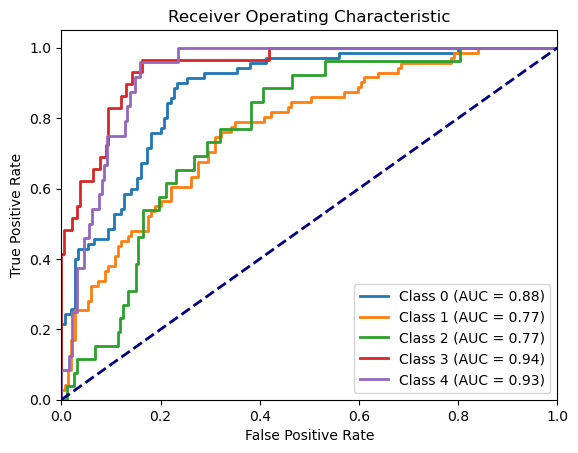

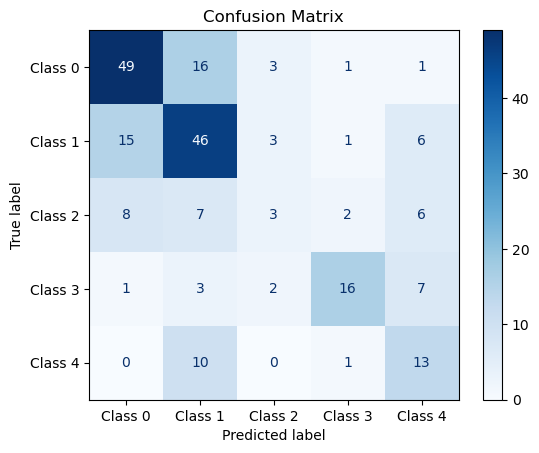

In [212]:
# Load your tabular data
excel_file_path = base_path + '/extracted_features.csv' 
# excel_file_path = base_path + '/positive_correlated_data.csv'
# excel_file_path = base_path +  '/anova_selected_features.csv'

df = pd.read_csv(excel_file_path)

# Assuming your target column is named 'Class'
X = df.drop('Class', axis=1).values  # Features
y = df['Class'].values  # Target variable

# Initialize the StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Generate a graph based on your features
K = 15  # Number of nearest neighbors to consider
knn = NearestNeighbors(n_neighbors=K, algorithm='ball_tree')
knn.fit(X_normalized)  # Use the normalized data for graph construction
knn_indices = knn.kneighbors(return_distance=False)

graph = nx.Graph()
for i in range(len(df)):
    graph.add_node(i)
for i, neighbors in enumerate(knn_indices):
    for neighbor in neighbors:
        if i != neighbor:
            graph.add_edge(i, neighbor)

labels = {i: label for i, label in enumerate(y)}
nx.set_node_attributes(graph, labels, 'label')

# Create the PyTorch Geometric Data object for the graph data
edge_index = torch.tensor(np.array(list(graph.edges())).T, dtype=torch.long)
x = torch.tensor(X_normalized, dtype=torch.float)
y = torch.tensor(y, dtype=torch.long)
data = Data(x=x, edge_index=edge_index, y=y)

# Create train, validation, and test masks
num_nodes = data.x.size(0)
train_ratio, val_ratio, test_ratio = 0.7, 0.15, 0.15
train_indices, test_indices = train_test_split(range(num_nodes), test_size=test_ratio, random_state=42)
train_indices, val_indices = train_test_split(train_indices, test_size=val_ratio / (train_ratio + val_ratio), random_state=42)

train_mask = torch.zeros(num_nodes, dtype=torch.bool)
val_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)
train_mask[train_indices] = True
val_mask[val_indices] = True
test_mask[test_indices] = True

# Define a custom GAT model

# Initialize the custom GAT model
hidden_channels = 256
num_classes = len(torch.unique(y))
model = ModelGAT(num_features=x.size(1), hidden_channels=hidden_channels, num_classes=num_classes)

# Define optimizer, loss function, and scheduler
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-4)
criterion = nn.CrossEntropyLoss()
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10, verbose=True)

# Training loop with train-test split
best_val_accuracy = 0.0
best_test_accuracy = 0.0
patience = 70
early_stopping_counter = 0

for epoch in range(50):
    model.train()
    optimizer.zero_grad()

    # Forward pass and loss calculation for training nodes
    out = model(data.x, data.edge_index)
    loss = criterion(out[train_mask], data.y[train_mask])
    loss.backward()
    optimizer.step()

    # Validation and testing
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index)
        y_pred = out.argmax(dim=1)

        train_accuracy = accuracy_score(data.y[train_mask].cpu(), y_pred[train_mask].cpu())
        val_accuracy = accuracy_score(data.y[val_mask].cpu(), y_pred[val_mask].cpu())
        test_accuracy = accuracy_score(data.y[test_mask].cpu(), y_pred[test_mask].cpu())
        precision_weighted, recall_weighted, f1_weighted, _ = precision_recall_fscore_support(data.y[test_mask].cpu(),  y_pred[test_mask].cpu(), average='weighted')

    scheduler.step(loss)
    print(
        f"Epoch {epoch}, Loss: {loss:.4f}\n"
        f"Train Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}\n"
        f"Test Sensitivity (Recall Weighted): {recall_weighted:.4f}, Test F1-Score: {f1_weighted:.4f}"
    )


    # Early stopping based on validation accuracy
    if best_test_accuracy < test_accuracy:
        best_val_accuracy = val_accuracy
        best_test_accuracy = test_accuracy
        early_stopping_counter = 0
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= patience:
            print("Early stopping")
            break

print(f"Best Validation Accuracy: {best_val_accuracy:.4f}, Best Test Accuracy: {best_test_accuracy:.4f}")

# ROC curve and confusion matrix evaluation
model.eval()
with torch.no_grad():
    out = model(data.x, data.edge_index)
    y_scores = out.softmax(dim=1).cpu().numpy()

# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
n_classes = y_scores.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(data.y[test_mask].cpu() == i, y_scores[test_mask, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Confusion matrix
y_true = data.y[test_mask].cpu().numpy()
y_pred = y_pred[test_mask].cpu().numpy()
cm = confusion_matrix(y_true, y_pred)
class_names = [f'Class {i}' for i in range(n_classes)]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()
